# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [2]:
dataset = pd.read_csv('Titanic.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [4]:
dataset = pd.read_csv('titanic_simplified.csv')

In [5]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“what sorts of people were more likely to survive?”**

Here are some computations to do on the data set (you are free to make extra tests and exploration on your own):
* General information:
 * Number of passengers
 * Mean age of the passengers
 * Number of passengers above 70 years old
 * Proportion of each class of passenger
 * Age distribution of the passengers depending on the port of embarkment (density plots)
 * Fare vs. age (scatter plot)
* Information linked to survival:
 * Age distribution of the passengers who survided/did not survive (histogram)
 * Repartition of survivals among men and women (stacked bars)
 * Repartition of survivals for each class (stacked bars)
 
How do you interpret the results of your exploration?

**_Note:_ Your graphs should formatted so they are easily readable. It is expected that you provide a title and axis labels, as well as a legend when necessary.** 

## General information:

**Number of passengers**

In [6]:
nb_passengers = len(dataset['Survived'])
print(nb_passengers)

891


**Mean age of the passengers**

In [7]:
dataset['Age'].mean()

29.789191919191918

**Number of passengers above 70 years old**

In [8]:
nbAge = sum(dataset['Age'] > 70)
print(nbAge)

8


**Proportion of each class of passenger**

In [9]:
propClass1 = (dataset['Pclass']== 1 ).sum() / len(dataset)
propClass2 = (dataset['Pclass']== 2 ).sum() / len(dataset)
propClass3 = (dataset['Pclass']== 3 ).sum() / len(dataset)
print(f'Proportion of 1st class of passenger: {propClass1}')
print(f'Proportion of 2nd class of passenger: {propClass2}')
print(f'Proportion of 3rd class of passenger: {propClass3}')

Proportion of 1st class of passenger: 0.24242424242424243
Proportion of 2nd class of passenger: 0.20650953984287318
Proportion of 3rd class of passenger: 0.5510662177328844


 **Age distribution of the passengers depending on the port of embarkment (density plots)**

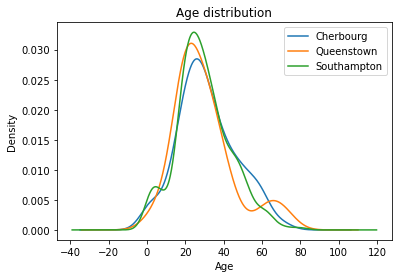

In [13]:
dataset.groupby('Embarked')['Age'].plot(kind='density')

plt.title('Age distribution')
plt.xlabel('Age')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

**Fare vs. age (scatter plot)**

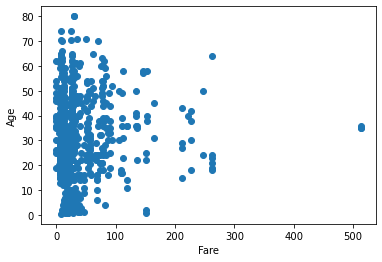

In [89]:
plt.scatter(dataset['Fare'], dataset['Age'])

plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

## Information linked to survival:

#### Age distribution of the passengers who survided/did not survive (histogram)

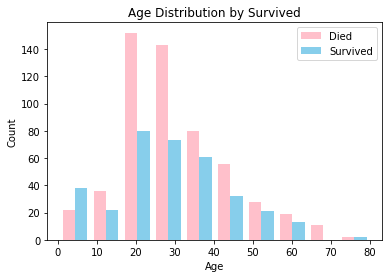

In [53]:
ageDied = dataset[dataset['Survived'] == 0]['Age']
ageSurvived = dataset[dataset['Survived'] == 1]['Age']
plt.hist(x = [ageDied, ageSurvived], color=['pink', 'skyblue'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.title('Age Distribution by Survived')
plt.show()

#### Repartition of survivals among men and women (stacked bars)

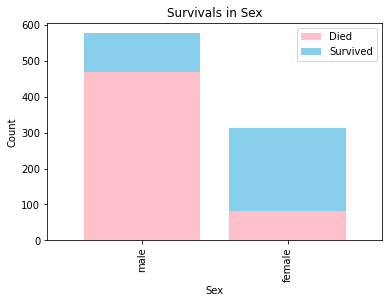

In [55]:
df_plot = dataset.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['pink', 'skyblue'], width=0.8)

plt.xlabel('Sex')
plt.xticks((0, 1), ('male', 'female'))
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.title('Survivals in Sex')
plt.show()

#### Repartition of survivals for each class (stacked bars)

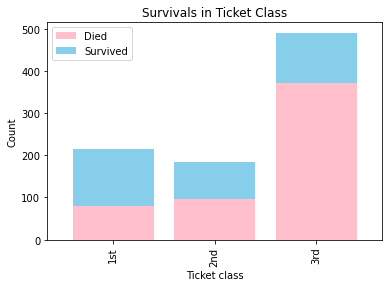

In [56]:
df_plot = dataset.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['pink', 'skyblue'], width=0.8)

plt.xlabel('Ticket class')
plt.xticks((0, 1, 2), ('1st', '2nd', '3rd'))
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.title('Survivals in Ticket Class')
plt.show()

#### Analysing what sorts of people were more likely to survive

According to my exploration, the female in 1st class whose age between 20 to 40 were more likely to survive.